# Notebook for data exploration

⚠️ The data that is explored is only the training data and NOT the test data. But transformations applied to the training data will also be applied to the test data, of course. This is important to let our model "see" the same world of data! 

In [2]:
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
path_train_data = Path("/Users/johanneseder711/Documents/Python/01_active/Fan Predictor/S3_split_data/train.csv")

In [4]:
if path_train_data.exists():
    df_train = pd.read_csv(path_train_data, sep=';', parse_dates=[0], infer_datetime_format=True)
else:
    print("There was a problem with the path that you provided to import the data - please check:\n %s"%path_train_data)

In [76]:
df_train.head()

Datetime                  Liga     Round    Hometeam  \
0 2021-08-15 17:30:00  2 Klasse Yspertal/AV  1. Runde  Emmersdorf   
1 2021-08-15 17:30:00  2 Klasse Yspertal/AV  1. Runde    Nöchling   
2 2021-08-15 17:30:00  2 Klasse Yspertal/AV  1. Runde   Pöggstall   
3 2021-08-13 20:00:00  2 Klasse Yspertal/AV  1. Runde   Jauerling   
4 2021-08-22 17:00:00  2 Klasse Yspertal/AV  2. Runde    Neumarkt   

   Hometeam Standing  Hometeam points          Awayteam  Awayteam Standing  \
0                  7                0            Leiben                  7   
1                  7                0  Alpenvorland USG                  7   
2                  7                0            Erlauf                  7   
3                  7                0     Kleinpöchlarn                  7   
4                  7                1            Weiten                 11   

   Awayteam points  Fans watching  ... location_lattitude location_longitude  \
0                0            120  ...          48.246908          15.333008   
1                0            126  ...          48.223577          14.986886   
2                0              0  ...          48.313518          15.187767   
3                0             42  ...          48.303540          15.343772   
4                0            140  ...          48.137429          15.057692   

   temp feelslike humidity precip snow  windspeed cloudcover conditions  
0  26.9      28.0     60.0    0.0  NaN       10.6        0.0      Clear  
1  29.3      30.2     50.3    0.0  NaN        5.2        3.3      Clear  
2  27.2      28.2     57.6    0.0  NaN        8.3        0.0      Clear  
3  21.9      21.9     77.5    0.0  NaN       13.8        0.9      Clear  
4  21.3      21.3     76.8    0.0  NaN        4.4        0.0      Clear  

[5 rows x 30 columns]

In [82]:
df_train.columns

Index(['Datetime', 'Liga', 'Round', 'Hometeam', 'Hometeam Standing',
       'Hometeam points', 'Awayteam', 'Awayteam Standing', 'Awayteam points',
       'Fans watching', 'Match location', 'postal_codes_hometeam',
       'geopy_location_hometeam', 'geopy_lat_long_coordinates_hometeam',
       'postal_codes_awayteam', 'geopy_location_awayteam',
       'geopy_lat_long_coordinates_awayteam', 'distance_between_locations',
       'Datetime_string', 'Datetime_string.1', 'location_lattitude',
       'location_longitude', 'temp', 'feelslike', 'humidity', 'precip', 'snow',
       'windspeed', 'cloudcover', 'conditions'],
      dtype='object')

In [78]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1980 entries, 0 to 1979
Data columns (total 30 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   Datetime                             1980 non-null   datetime64[ns]
 1   Liga                                 1980 non-null   object        
 2   Round                                1980 non-null   object        
 3   Hometeam                             1980 non-null   object        
 4   Hometeam Standing                    1980 non-null   int64         
 5   Hometeam points                      1980 non-null   int64         
 6   Awayteam                             1980 non-null   object        
 7   Awayteam Standing                    1980 non-null   int64         
 8   Awayteam points                      1980 non-null   int64         
 9   Fans watching                        1980 non-null   int64         
 10  Match locati

### 🎯 Target variable: "Fans watching"

# Checking Datetime column

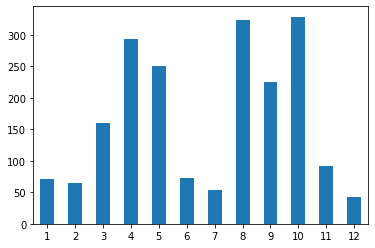

In [79]:
#plot how many games have been played per month
df_train.Datetime.dt.month.value_counts().sort_index().plot(kind='bar')
plt.xticks(rotation=0)
plt.show()

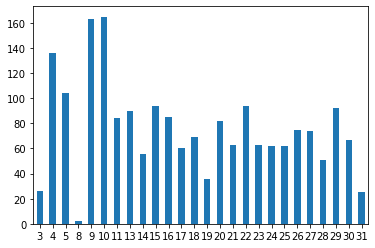

In [81]:
#plot how many games have been played per month
df_train.Datetime.dt.day.value_counts().sort_index().plot(kind='bar')
plt.xticks(rotation=0)
plt.show()

In [89]:
df_train[df_train.Datetime==df_train.Datetime.min()]

Datetime                              Liga     Round  \
29   2021-01-10 19:30:00              2 Klasse Yspertal/AV  6. Runde   
180  2021-01-10 19:30:00               2 Klasse Ybbstal/AV  8. Runde   
320  2021-01-10 19:30:00                     1 Klasse Nord  8. Runde   
479  2021-01-10 19:30:00                      1 Klasse Ost  8. Runde   
480  2021-01-10 19:30:00                      1 Klasse Ost  8. Runde   
721  2021-01-10 19:30:00                      1 Klasse Süd  8. Runde   
722  2021-01-10 19:30:00                      1 Klasse Süd  8. Runde   
852  2021-01-10 19:30:00                     1 Klasse West  8. Runde   
979  2021-01-10 19:30:00                 1 Klasse Nordwest  8. Runde   
1109 2021-01-10 19:30:00         Gebietsliga Nord/Nordwest  8. Runde   
1110 2021-01-10 19:30:00         Gebietsliga Nord/Nordwest  8. Runde   
1240 2021-01-10 19:30:00  Gebietsliga Nordwest/Waldviertel  8. Runde   
1359 2021-01-10 19:30:00            Gebietsliga Süd/Südost  8. Runde   
1360 2021-01-10 19:30:00            Gebietsliga Süd/Südost  8. Runde   
1361 2021-01-10 19:30:00            Gebietsliga Süd/Südost  8. Runde   
1362 2021-01-10 19:30:00            Gebietsliga Süd/Südost  8. Runde   
1363 2021-01-10 19:30:00            Gebietsliga Süd/Südost  8. Runde   
1494 2021-01-10 19:30:00                  Gebietsliga West  8. Runde   
1624 2021-01-10 19:30:00                  2 Landesliga Ost  8. Runde   
1625 2021-01-10 19:30:00                  2 Landesliga Ost  8. Runde   
1626 2021-01-10 19:30:00                  2 Landesliga Ost  8. Runde   
1754 2021-01-10 19:30:00                 2 Landesliga West  8. Runde   
1877 2021-01-10 19:30:00                      1 Landesliga  8. Runde   
1878 2021-01-10 19:30:00                      1 Landesliga  8. Runde   
1879 2021-01-10 19:30:00                      1 Landesliga  8. Runde   
1880 2021-01-10 19:30:00                      1 Landesliga  8. Runde   

               Hometeam  Hometeam Standing  Hometeam points  \
29               Leiben                  2               11   
180           Wolfsbach                 15                1   
320      Deutsch Wagram                  2               17   
479              Haslau                 16                3   
480           Sommerein                  3               16   
721            Wiesmath                 12                4   
722              Zöbern                  3               16   
852    Waldhausen-OÖ/G.                  7               10   
979           Gaubitsch                 10                8   
1109  FC Klosterneuburg                 11                7   
1110          Laa/Thaya                 13                5   
1240            Absdorf                  4               12   
1359    1. SC Felixdorf                 12                3   
1360  Bad Fischau-Brunn                  7               11   
1361       Guntramsdorf                  2               16   
1362         Marienthal                  4               14   
1363             Trumau                  1               17   
1494         Hofstetten                 13                6   
1624         Brunn/Geb.                 11                7   
1625         Korneuburg                  4               14   
1626         Mistelbach                  8               10   
1754         Wieselburg                  2               17   
1877        ASV Schrems                 13                5   
1878         Kremser SC                  2               16   
1879         SC Ortmann                  7                9   
1880       SCU Ardagger                  4               12   

                    Awayteam  Awayteam Standing  Awayteam points  \
29          Alpenvorland USG                  5                8   
180               Strengberg                 13                3   
320                 Poysdorf                  4               15   
479         Maria Lanzendorf                  1               18   
480                  Himberg 

<AxesSubplot:xlabel='Datetime'>

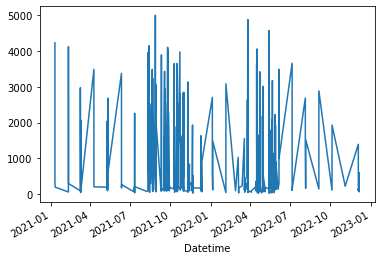

In [43]:
df_train.groupby('Datetime').sum()['Fans watching'].plot(kind='line')

In [32]:
df_train[df_train.Liga.str.contains('Landesliga')].sort_values(by='Datetime')

Datetime               Liga      Round  \
1754 2021-01-10 19:30:00  2 Landesliga West   8. Runde   
1878 2021-01-10 19:30:00       1 Landesliga   8. Runde   
1879 2021-01-10 19:30:00       1 Landesliga   8. Runde   
1880 2021-01-10 19:30:00       1 Landesliga   8. Runde   
1877 2021-01-10 19:30:00       1 Landesliga   8. Runde   
...                  ...                ...        ...   
1922 2022-12-03 17:00:00       1 Landesliga  16. Runde   
1796 2022-12-04 20:00:00  2 Landesliga West  16. Runde   
1661 2022-12-04 20:00:00   2 Landesliga Ost  15. Runde   
1795 2022-12-04 20:00:00  2 Landesliga West  16. Runde   
1979 2022-12-05 20:00:00       1 Landesliga  25. Runde   

                    Hometeam  Hometeam Standing  Hometeam points  \
1754              Wieselburg                  2               17   
1878              Kremser SC                  2               16   
1879              SC Ortmann                  7                9   
1880            SCU Ardagger                  4               12   
1877             ASV Schrems                 13                5   
...                      ...                ...              ...   
1922         ASK Mannersdorf                 15                4   
1796           Seitenstetten                 11               16   
1661              Mistelbach                 12               14   
1795               Purgstall                  7               19   
1979  SKN St. Pölten Juniors                  5               33   

                    Awayteam  Awayteam Standing  Awayteam points  \
1754                    Melk                 11                6   
1878        ASK Kottingbrunn                 10                7   
1879                SCU Kilb                 12                6   
1880               SC Zwettl                  3               14   
1877  SKN St. Pölten Juniors                  9                7   
...                      ...                ...              ...   
1922            SCU Ardagger                  4               23   
1796              Rabenstein                  6               22   
1661            Stockerau SV                  2               26   
1795             Amaliendorf                  8               19   
1979              SC Ortmann                  6               32   

      Fans watching  ... location_lattitude location_longitude temp feelslike  \
1754            400  ...          48.123885          15.133193 -5.0      -7.2   
1878            300  ...          48.416976          15.602787 -2.9      -2.9   
1879            220  ...          48.021873          15.371111 -4.1      -6.7   
1880            350  ...          48.161527          14.844614 -4.8      -4.8   
1877            320  ...          48.793663          15.064902 -6.7      -6.7   
...             ...  ...                ...                ...  ...       ...   
1922            155  ...          47.975090          16.599175  NaN       NaN   
1796            185  ...          48.032287          14.667909  NaN       NaN   
1661            175  ...          48.571398          16.568990  NaN       NaN   
1795            120  ...          48.058657          15.134536  NaN       NaN   
1979             77  ...          48.204399          15.622912  NaN       NaN   

     humidity precip snow  windspeed cloudcover        conditions  
1754     90.7    0.0  NaN        4.9       17.2             Clear  
1878     84.2    0.0  NaN        3.7        0.1             Clear  
1879     89.3    0.0  NaN        6.0       19.9             Clear  
1880     91.4    0.0  NaN        3.8        4.2             Clear  
1877     91.9    0.0  NaN        2.3       27.9  Partially cloudy  
...       ...    ...  ...        ...        ...               ...  
1922      NaN    NaN  NaN        NaN        NaN               NaN  
1796      NaN    NaN  NaN        NaN        NaN               NaN  
1661      NaN    NaN  NaN        NaN        NaN               NaN  
1795      NaN    NaN  NaN       

# ⚠️ Data Error Found: 
Found a bug in the datetime column -> need to fix this in the "get the data" step 02 and will get back later to further investigations of the dates when this is completed. In the meanwhile I will continue to explore the other columns and prepare them for the model.

# Continue further data exploration

In [9]:
df_train.head()

Datetime                  Liga     Round    Hometeam  \
0 2021-08-15 17:30:00  2 Klasse Yspertal/AV  1. Runde  Emmersdorf   
1 2021-08-15 17:30:00  2 Klasse Yspertal/AV  1. Runde    Nöchling   
2 2021-08-15 17:30:00  2 Klasse Yspertal/AV  1. Runde   Pöggstall   
3 2021-08-13 20:00:00  2 Klasse Yspertal/AV  1. Runde   Jauerling   
4 2021-08-22 17:00:00  2 Klasse Yspertal/AV  2. Runde    Neumarkt   

   Hometeam Standing  Hometeam points          Awayteam  Awayteam Standing  \
0                  7                0            Leiben                  7   
1                  7                0  Alpenvorland USG                  7   
2                  7                0            Erlauf                  7   
3                  7                0     Kleinpöchlarn                  7   
4                  7                1            Weiten                 11   

   Awayteam points  Fans watching  ... location_lattitude location_longitude  \
0                0            120  ...          48.246908          15.333008   
1                0            126  ...          48.223577          14.986886   
2                0              0  ...          48.313518          15.187767   
3                0             42  ...          48.303540          15.343772   
4                0            140  ...          48.137429          15.057692   

   temp feelslike humidity precip snow  windspeed cloudcover conditions  
0  26.9      28.0     60.0    0.0  NaN       10.6        0.0      Clear  
1  29.3      30.2     50.3    0.0  NaN        5.2        3.3      Clear  
2  27.2      28.2     57.6    0.0  NaN        8.3        0.0      Clear  
3  21.9      21.9     77.5    0.0  NaN       13.8        0.9      Clear  
4  21.3      21.3     76.8    0.0  NaN        4.4        0.0      Clear  

[5 rows x 30 columns]

In [6]:
df_train.describe()

Hometeam Standing  Hometeam points  Awayteam Standing  Awayteam points  \
count        1980.000000      1980.000000        1980.000000      1980.000000   
mean            7.746465        15.526768           7.745455        15.477273   
std             4.114992        11.866564           4.072096        11.860269   
min             1.000000         0.000000           1.000000         0.000000   
25%             4.000000         6.000000           4.000000         6.000000   
50%             8.000000        14.000000           8.000000        13.000000   
75%            11.000000        23.000000          11.000000        23.000000   
max            16.000000        64.000000          16.000000        61.000000   

       Fans watching  distance_between_locations  location_lattitude  \
count    1980.000000                 1980.000000         1980.000000   
mean      145.037879                   34.569049           48.245987   
std        91.608859                   27.089262            0.311694   
min         0.000000                    1.676912           47.508373   
25%        95.000000                   15.626884           48.041652   
50%       120.000000                   27.972006           48.204399   
75%       175.000000                   45.450348           48.435859   
max      1000.000000                  179.048184           48.954283   

       location_longitude         temp    feelslike     humidity      precip  \
count         1980.000000  1838.000000  1838.000000  1838.000000  1838.00000   
mean            15.738362    14.524266    13.951415    59.737465     0.04222   
std              0.673258     7.885331     8.711592    18.132915     0.20535   
min             14.497568    -7.000000   -10.100000    14.100000     0.00000   
25%             15.121923     9.000000     7.400000    46.500000     0.00000   
50%             15.774157    14.300000    14.300000    60.600000     0.00000   
75%             16.305464    20.675000    20.675000    72.275000     0.00000   
max             16.941193    32.800000    34.200000    99.200000     3.90000   

        snow    windspeed   cloudcover  
count  649.0  1838.000000  1838.000000  
mean     0.0    11.432155    11.170675  
std      0.0     6.719880    20.856279  
min      0.0     0.000000     0.000000  
25%      0.0     6.900000     0.000000  
50%      0.0     9.900000     1.700000  
75%      0.0    14.700000    11.400000  
max      0.0    66.900000   100.000000

In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1980 entries, 0 to 1979
Data columns (total 30 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   Datetime                             1980 non-null   datetime64[ns]
 1   Liga                                 1980 non-null   object        
 2   Round                                1980 non-null   object        
 3   Hometeam                             1980 non-null   object        
 4   Hometeam Standing                    1980 non-null   int64         
 5   Hometeam points                      1980 non-null   int64         
 6   Awayteam                             1980 non-null   object        
 7   Awayteam Standing                    1980 non-null   int64         
 8   Awayteam points                      1980 non-null   int64         
 9   Fans watching                        1980 non-null   int64         
 10  Match locati

# Extract the current round (number) from string

In [16]:
df_train['Round'] = df_train.Round.str.extract('([0-9]+)').astype('int')

In [17]:
df_train.head()

Datetime                  Liga  Round    Hometeam  \
0 2021-08-15 17:30:00  2 Klasse Yspertal/AV      1  Emmersdorf   
1 2021-08-15 17:30:00  2 Klasse Yspertal/AV      1    Nöchling   
2 2021-08-15 17:30:00  2 Klasse Yspertal/AV      1   Pöggstall   
3 2021-08-13 20:00:00  2 Klasse Yspertal/AV      1   Jauerling   
4 2021-08-22 17:00:00  2 Klasse Yspertal/AV      2    Neumarkt   

   Hometeam Standing  Hometeam points          Awayteam  Awayteam Standing  \
0                  7                0            Leiben                  7   
1                  7                0  Alpenvorland USG                  7   
2                  7                0            Erlauf                  7   
3                  7                0     Kleinpöchlarn                  7   
4                  7                1            Weiten                 11   

   Awayteam points  Fans watching  ... location_lattitude location_longitude  \
0                0            120  ...          48.246908          15.333008   
1                0            126  ...          48.223577          14.986886   
2                0              0  ...          48.313518          15.187767   
3                0             42  ...          48.303540          15.343772   
4                0            140  ...          48.137429          15.057692   

   temp feelslike humidity precip snow  windspeed cloudcover conditions  
0  26.9      28.0     60.0    0.0  NaN       10.6        0.0      Clear  
1  29.3      30.2     50.3    0.0  NaN        5.2        3.3      Clear  
2  27.2      28.2     57.6    0.0  NaN        8.3        0.0      Clear  
3  21.9      21.9     77.5    0.0  NaN       13.8        0.9      Clear  
4  21.3      21.3     76.8    0.0  NaN        4.4        0.0      Clear  

[5 rows x 30 columns]

# Drop games with 0 visitors/fans

In [22]:
print("The number of games with 0 visitors is %d."%len(df_train[df_train['Fans watching'] == 0]))

The number of games with 0 visitors is 11.


In [20]:
df_train[df_train['Fans watching'] == 0]

Datetime                    Liga  Round            Hometeam  \
2    2021-08-15 17:30:00    2 Klasse Yspertal/AV      1           Pöggstall   
210  2021-11-13 14:00:00     2 Klasse Ybbstal/AV     14             Gaflenz   
273  2021-08-13 19:30:00           1 Klasse Nord      1         Zistersdorf   
491  2021-10-16 15:30:00            1 Klasse Ost     10          Wienerwald   
622  2022-02-04 16:30:00    1 Klasse Waldviertel     15  SG Brand/Nagelberg   
656  2022-05-15 16:30:00    1 Klasse Waldviertel     21          Dobersberg   
701  2021-12-09 16:30:00            1 Klasse Süd      5        Grimmenstein   
1031 2022-04-16 16:30:00       1 Klasse Nordwest     17       Enzersfeld/W.   
1324 2021-08-13 19:30:00  Gebietsliga Süd/Südost      1     1. SC Felixdorf   
1413 2022-04-16 16:30:00  Gebietsliga Süd/Südost     17     Kaltenleutgeben   
1903 2021-10-29 19:30:00            1 Landesliga     12        USC Rohrbach   

      Hometeam Standing  Hometeam points                    Awayteam  \
2                     7                0                      Erlauf   
210                  15                3                  Strengberg   
273                   8                0                    Großkrut   
491                  11                8                Göttlesbrunn   
622                   7               20            Heidenreichstein   
656                  12               23                     Kautzen   
701                   7                6             Oberwaltersdorf   
1031                  1               35  Muckendorf/Zeiselmauer USC   
1324                  7                0           Leopoldsdorf/Wien   
1413                  7               21           Leopoldsdorf/Wien   
1903                 13                8               SV Langenrohr   

      Awayteam Standing  Awayteam points  Fans watching  ...  \
2                     7                0              0  ...   
210                  11               12              0  ...   
273                   8                0              0  ...   
491                   4               17              0  ...   
622                   3               29              0  ...   
656                   7               27              0  ...   
701                   6                6              0  ...   
1031                  3               33              0  ...   
1324                  7                0              0  ...   
1413                  6               22              0  ...   
1903                  8               13              0  ...   

     location_lattitude location_longitude  temp feelslike humidity precip  \
2             48.313518          15.187767  27.2      28.2     57.6    0.0   
210           47.895336          14.720967   7.8       7.1     77.9    0.0   
273           48.544496          16.756374  28.9      29.2     47.8    0.0   
491           48.075214          16.171652  13.9      13.9     52.7    0.0   
622           48.868504          15.021359   5.2       3.3     74.9    0.0   
656           48.909664          15.312094  22.2      22.2     36.9    0.0   
701           47.619341          16.117793  -2.0      -4.7     88.3    0.0   
1031          48.355294          16.419623   8.9       5.6     49.6    0.0   
1324          47.878960          16.238070  26.4      26.4     53.5    0.0   
1413          48.118645          16.207235   9.0       6.4     51.1    0.0   
1903          48.048976          15.737437  11.7      11.7     40.6    0.0   

     snow  windspeed cloudcover conditions  
2     NaN        8.3        0.0      Clear  
210   NaN        5.6        0.0      Clear  
273   NaN        9.6        5.5      Clear  
491   NaN       11.0        0.7      Clear  
622   0.0        8.1        9.5      Clear  
656   0.0        4.0        1.6      Clear  
701   NaN        7.1        0.0      Clear  
1031  0.0       24.0        9.2      Clear  
1324  NaN       15.8        0.0      Clear  
1413  0.0       17.5        0.0      Clear  
1

In [25]:
df_train.columns

Index(['Datetime', 'Liga', 'Round', 'Hometeam', 'Hometeam Standing',
       'Hometeam points', 'Awayteam', 'Awayteam Standing', 'Awayteam points',
       'Fans watching', 'Match location', 'postal_codes_hometeam',
       'geopy_location_hometeam', 'geopy_lat_long_coordinates_hometeam',
       'postal_codes_awayteam', 'geopy_location_awayteam',
       'geopy_lat_long_coordinates_awayteam', 'distance_between_locations',
       'Datetime_string', 'Datetime_string.1', 'location_lattitude',
       'location_longitude', 'temp', 'feelslike', 'humidity', 'precip', 'snow',
       'windspeed', 'cloudcover', 'conditions'],
      dtype='object')

In [37]:
#find the mean number of fans watching per league
df_train.groupby('Liga').mean()['Fans watching'].sort_values()

Liga
2 Klasse Yspertal/AV                 87.466667
2 Klasse Ybbstal/AV                  94.803030
1 Klasse Nordwest                    97.545455
1 Klasse Ost                        103.818182
1 Klasse Nord                       116.398773
Gebietsliga Süd/Südost              132.938931
Gebietsliga Nord/Nordwest           141.015873
1 Klasse West                       146.085938
Gebietsliga West                    146.204545
1 Klasse Süd                        146.575758
1 Klasse Waldviertel                146.955882
Gebietsliga Nordwest/Waldviertel    158.348837
2 Landesliga Ost                    183.626984
2 Landesliga West                   210.765625
1 Landesliga                        260.907143
Name: Fans watching, dtype: float64

In [36]:
df_train.groupby('Liga').median()['Fans watching'].sort_values()

Liga
2 Klasse Yspertal/AV                 85.0
2 Klasse Ybbstal/AV                  86.0
1 Klasse Nordwest                    93.0
1 Klasse Ost                         98.0
1 Klasse Nord                       100.0
Gebietsliga Nord/Nordwest           120.0
Gebietsliga Süd/Südost              120.0
1 Klasse Süd                        130.0
1 Klasse Waldviertel                130.0
Gebietsliga West                    143.0
1 Klasse West                       150.0
Gebietsliga Nordwest/Waldviertel    150.0
2 Landesliga Ost                    156.5
2 Landesliga West                   186.0
1 Landesliga                        220.0
Name: Fans watching, dtype: float64

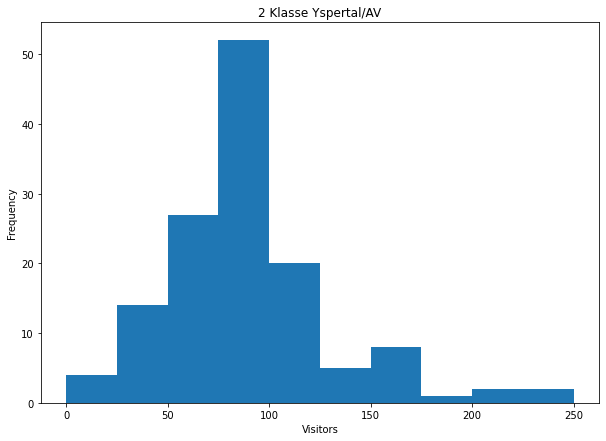

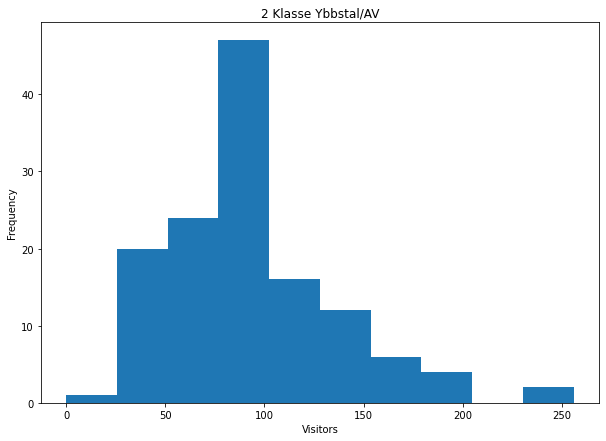

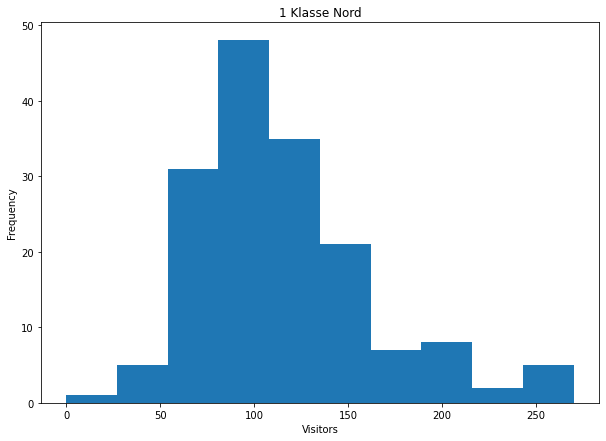

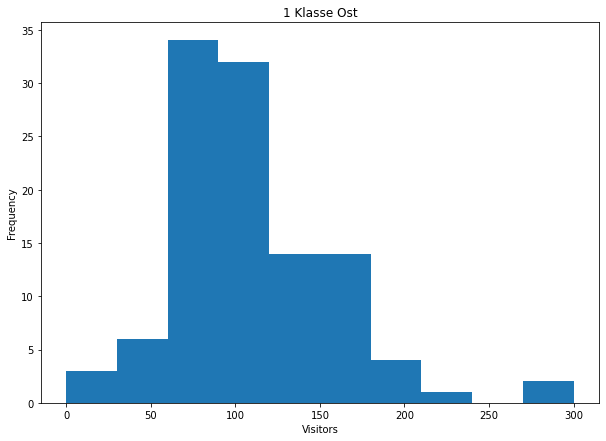

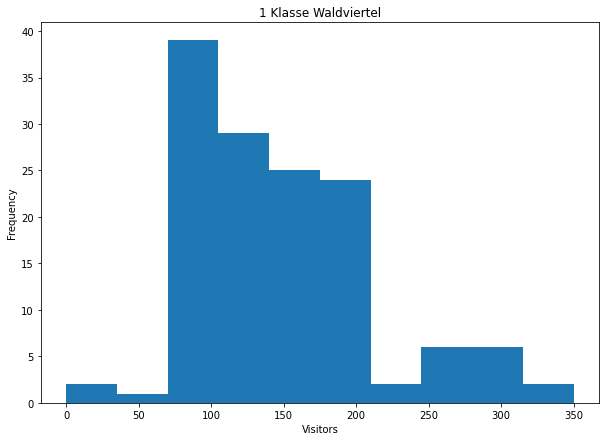

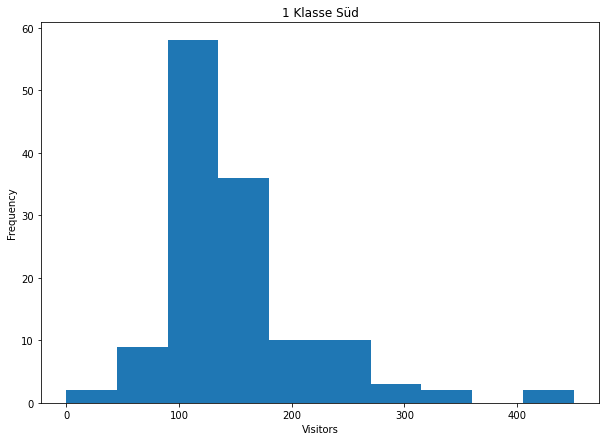

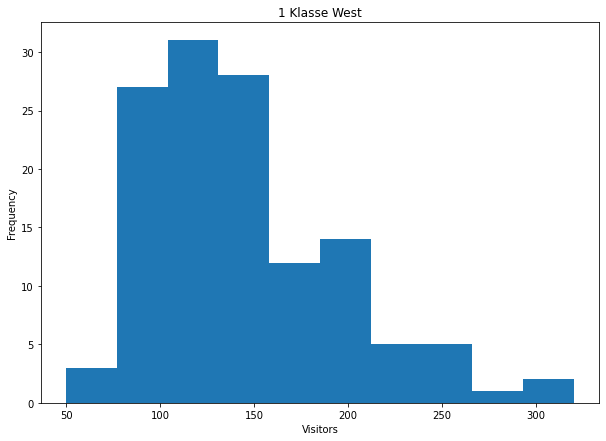

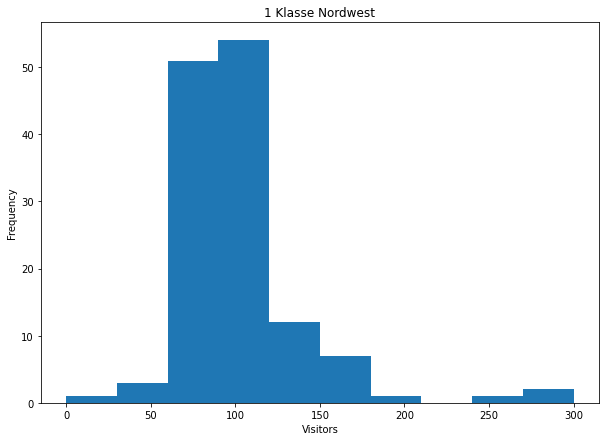

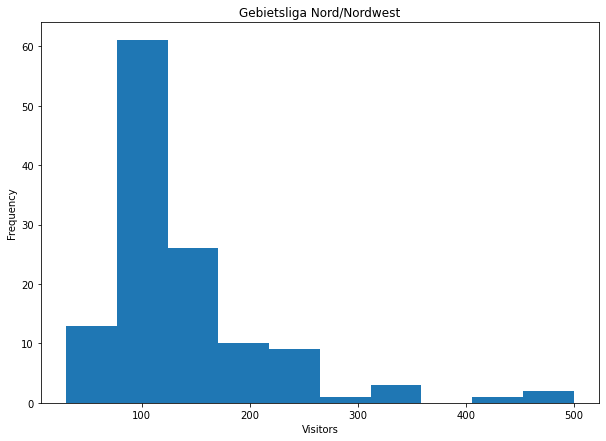

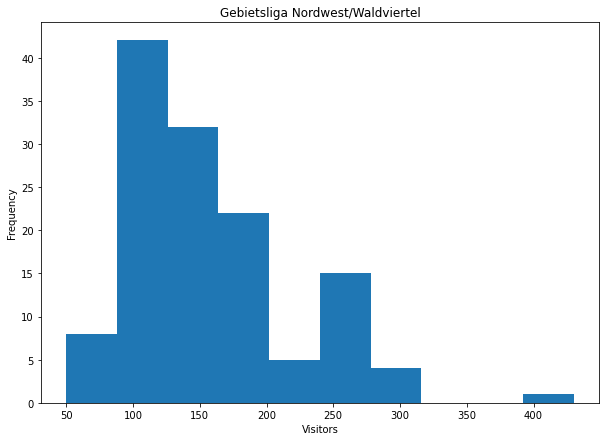

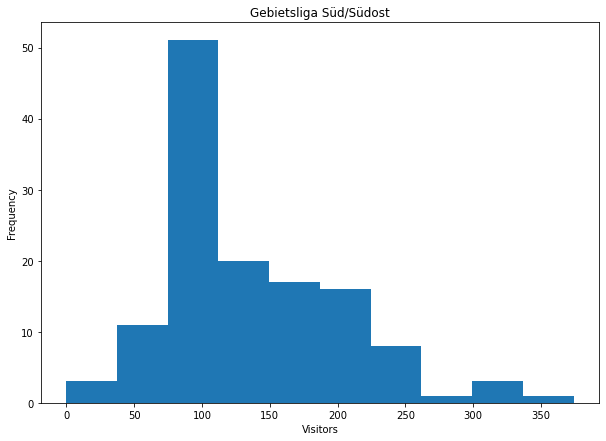

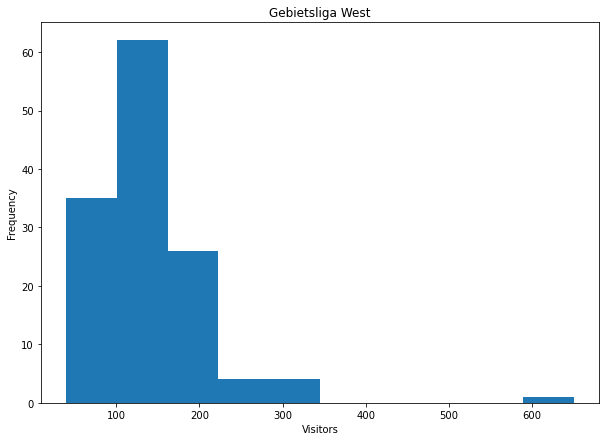

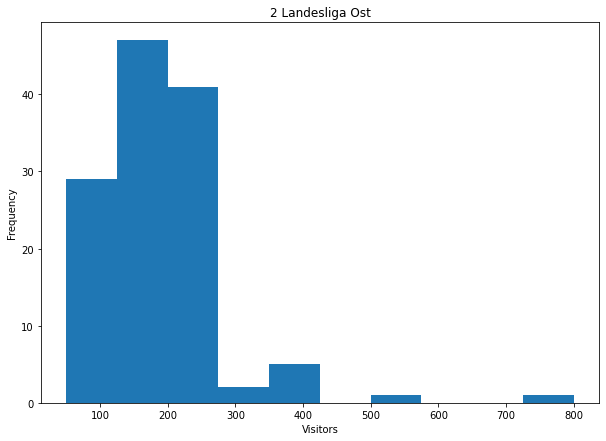

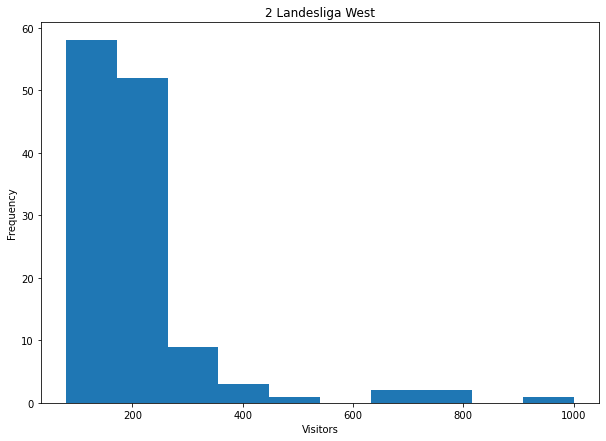

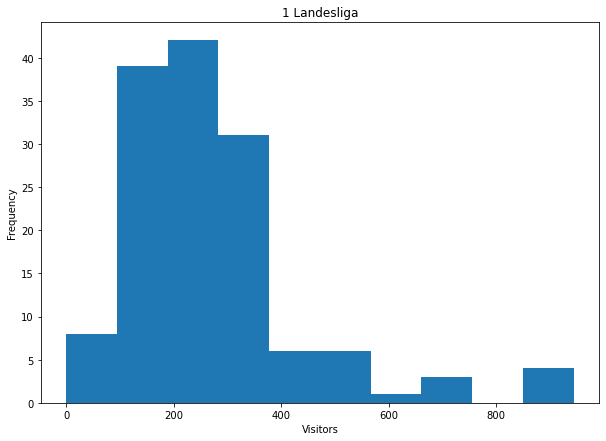

In [43]:
for liga in df_train.Liga.unique():
    df_train[df_train.Liga == liga]['Fans watching'].plot(kind='hist', figsize=(10,7), title=liga)
    plt.xlabel('Visitors')
    plt.show()

In [55]:
df_train.sort_values(by='Fans watching', ascending=False).head(10)

Datetime               Liga  Round  \
1788 2022-03-26 15:30:00  2 Landesliga West     14   
1870 2021-09-25 16:00:00       1 Landesliga      7   
1905 2021-07-11 14:00:00       1 Landesliga     13   
1873 2021-09-24 19:30:00       1 Landesliga      7   
1856 2021-03-09 20:00:00       1 Landesliga      4   
1590 2021-08-13 19:30:00   2 Landesliga Ost      1   
1799 2022-04-17 16:30:00  2 Landesliga West     17   
1881 2021-10-26 17:00:00       1 Landesliga      9   
1835 2022-05-28 18:30:00  2 Landesliga West     23   
1850 2021-08-27 19:30:00       1 Landesliga      3   

                         Hometeam  Hometeam Standing  Hometeam points  \
1788                         Ybbs                  3               28   
1870                SC Mibag Retz                  5                9   
1905  USV Scheiblingkirchen-Warth                  1               33   
1873           SV Waidhofen/Thaya                  7                9   
1856                   Kremser SC                  1                9   
1590                 Stockerau SV                  7                0   
1799                  Haitzendorf                  1               42   
1881                    SC Zwettl                  3               15   
1835                    Purgstall                  7               28   
1850                   Kremser SC                  1                6   

           Awayteam  Awayteam Standing  Awayteam points  Fans watching  ...  \
1788     Wieselburg                  2               33           1000  ...   
1870  SV Langenrohr                  6                9            944  ...   
1905     Kremser SC                  2               27            850  ...   
1873    ASV Schrems                 13                4            850  ...   
1856   USC Rohrbach                 11                1            850  ...   
1590      Sierndorf                  7                0            800  ...   
1799     Wieselburg                  2               40            800  ...   
1881     Kremser SC                  2               17            750  ...   
1835     Wieselburg                  2               53            750  ...   
1850    ASV Schrems                 13                0            710  ...   

     location_lattitude location_longitude  temp feelslike humidity precip  \
1788          48.171197          15.077621  16.5      16.5     24.4    0.0   
1870          48.759114          15.953068  25.6      25.6     30.2    0.0   
1905          47.658784          16.134273  20.9      20.9     60.6    0.0   
1873          48.814055          15.286011  15.0      15.0     75.3    0.0   
1856          48.416976          15.602787  -1.1      -1.1     67.7    0.0   
1590          48.389600          16.207268  28.5      29.5     54.1    0.0   
1799          48.424368          15.739333  13.5      13.5     27.7    0.0   
1881          48.608263          15.162957  13.9      13.9     57.3    0.0   
1835          48.058657          15.134536  15.6      15.6     39.5    0.0   
1850          48.416976          15.602787  16.6      16.6     78.2    0.0   

     snow  windspeed cloudcover conditions  
1788  0.0        7.1        0.0      Clear  
1870  NaN       10.8        0.0      Clear  
1905  NaN       14.0       13.8      Clear  
1873  NaN        9.0        6.2      Clear  
1856  NaN        3.6        0.0      Clear  
1590  NaN       10.8        0.3      Clear  
1799  0.0       10.9        0.8      Clear  
1881  NaN        7.1        2.1      Clear  
1835  0.0       14.1        0.0      Clear  
1850  NaN        3.7        0.0      Clear  

[10 rows x 30 columns]

# Check correlation between number of watching fans and distance between opponents

<AxesSubplot:xlabel='Fans watching', ylabel='distance_between_locations'>

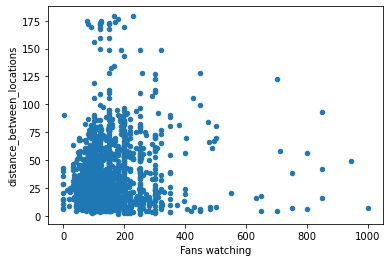

In [52]:
df_train.plot(kind='scatter', x='Fans watching', y='distance_between_locations')

<AxesSubplot:>

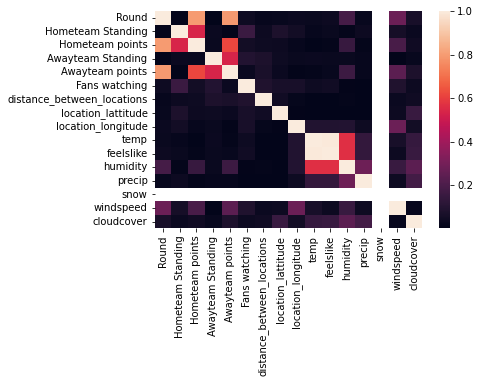

In [58]:
#check for correlations using seaborn heatmap
sns.heatmap(abs(df_train.corr()))

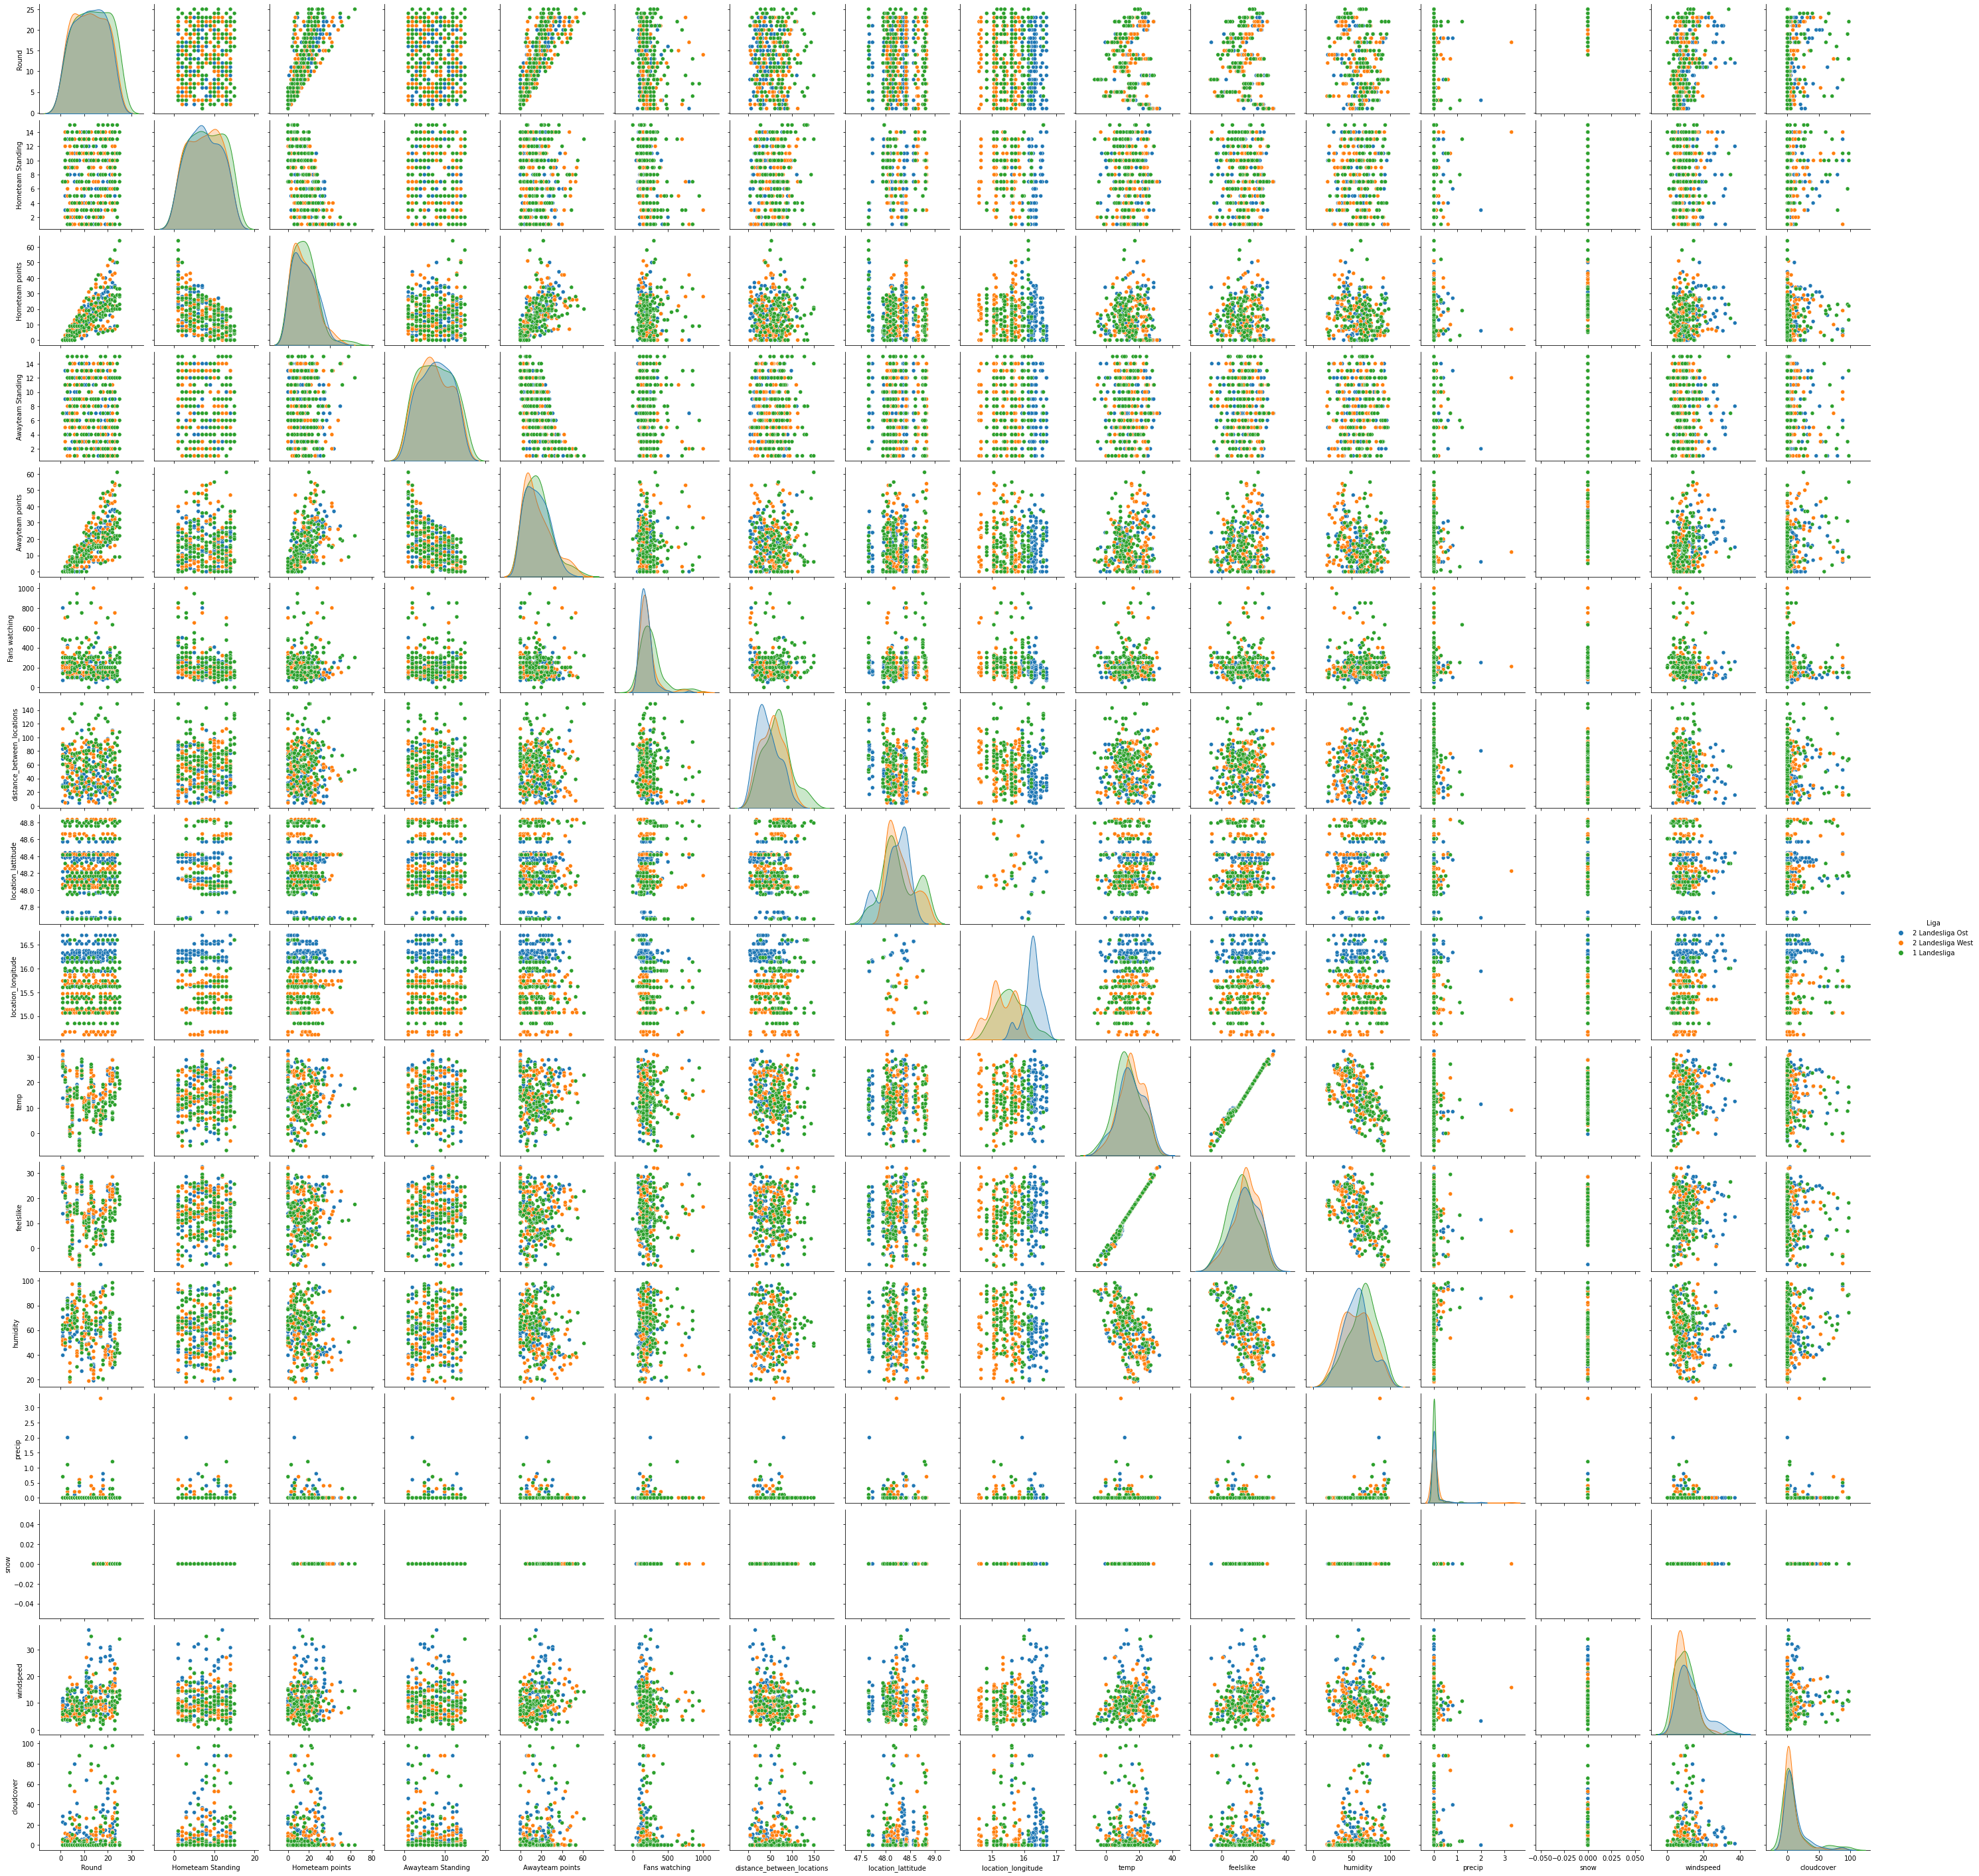

In [61]:
sns.pairplot(df_train[df_train.Liga.str.contains('Landesliga')], hue="Liga")
plt.show()